## Supervised Learning

### Case Study - 1 (CS 30)
---

### Objectives:

**Fit a model using binary classification using logistic regression.<br>
Identify correlated variables and form a less complex model.**

### Importing libraries and loading data

In [40]:
import pandas as pd
import matplotlib.pyplot as plot

In [41]:
df = pd.read_csv("datasets/voice.csv")
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [42]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


**Finding NULL values**

In [68]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

---

### Q1. Load the dataset from “voice.csv”, identify the target variable and do a one-hot encoding for the same. Split the dataset in train-test with 20% of the data kept aside for testing.

In [44]:
df.groupby('label').size()

label
female    1584
male      1584
dtype: int64

In [45]:
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

In [46]:
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [47]:
# Splitting the data into x and y variables

x = df.iloc[:,:-1]
y = df.iloc[:,-1]

### Label Encoding

In [67]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
y = LE.fit_transform(y)

print(y)

[1 1 1 ... 0 0 0]


---

### Q2. Fit a logistic regression model and measure the accuracy on the test set. 

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

print("X_train shape = {}.".format(X_train.shape))
print("X_test shape = {}.".format(X_test.shape))

X_train shape = (2534, 20).
X_test shape = (634, 20).


### Training the model

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train, y_train)

### Predicting the model

In [53]:
y_pred = LR.predict(X_test)
print(y_pred)

[0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0
 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1
 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1
 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1
 0 1 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1
 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1
 1 0 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1
 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1
 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1
 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0
 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 

### Accuracy score

In [61]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))

0.8659305993690851


### Classification report

In [63]:
from sklearn.metrics import classification_report
print(classification_report (y_pred, y_test))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       260
           1       0.95      0.82      0.88       374

    accuracy                           0.87       634
   macro avg       0.86      0.88      0.86       634
weighted avg       0.88      0.87      0.87       634



### Confusion matrix

In [66]:
from sklearn.metrics import confusion_matrix 
CM_ = confusion_matrix (y_pred, y_test)
print(CM_)

[[243  17]
 [ 68 306]]


---

### Q3. Compute the correlation matrix that describes the dependence between all predictors and identify the predictors that are highly correlated. Plot the correlation matrix using seaborn heatmap.

### Co-relation matrix

In [74]:
CR_ = df.corr()
display(CR_)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


### Heat-Map

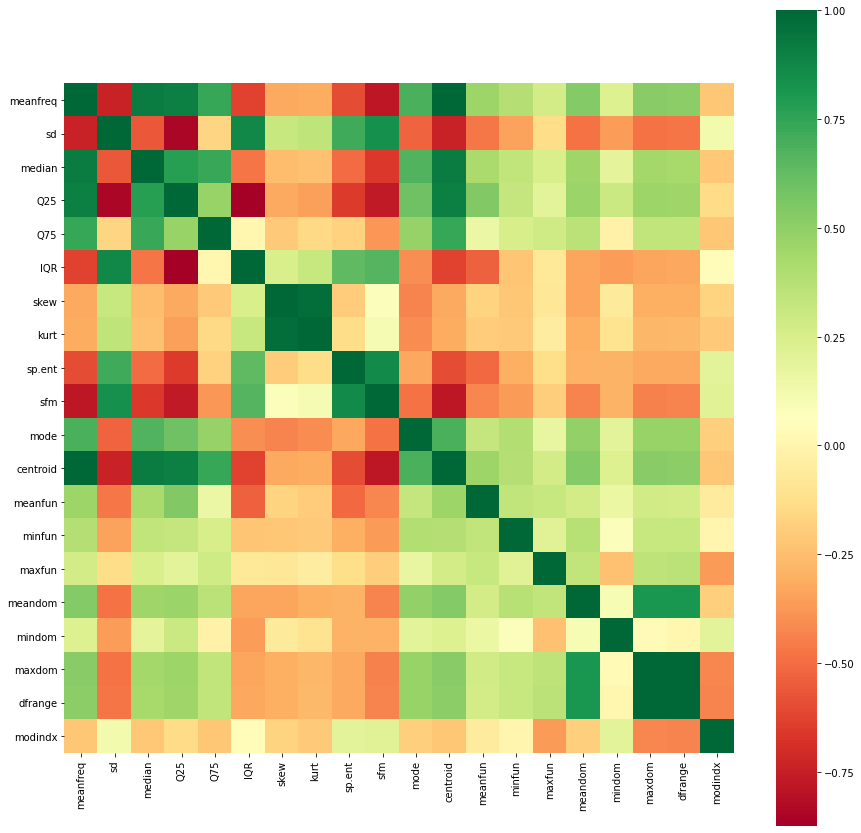

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 15))
sns.heatmap(CR_,square=True,cmap=plot.cm.RdYlGn)
plot.show()

---

### Q4. Based on correlation remove those predictors that are correlated and fit a logistic regression model again and compare the accuracy with that of previous model. 

In [79]:
def corelation(dataset, threshold):
    col_corr = set()
    CM_ = df.corr()
    for i in range (len(CM_.columns)):
        for j in range (i):
            if CM_.iloc[i,j]> threshold:
                colname = CM_.columns[i]
                col_corr.add(colname)
    return col_corr

cor_features = corelation (X_train, 0.7)
print(cor_features)

{'IQR', 'centroid', 'maxdom', 'kurt', 'Q25', 'sfm', 'Q75', 'sp.ent', 'dfrange', 'median'}


In [82]:
new_df = df.drop(cor_features, axis=1)
new_df

,meanfreq,sd,skew,mode,meanfun,minfun,maxfun,meandom,mindom,modindx,label
0,0.059781,0.064241,12.863462,0.000000,0.084279,0.015702,0.275862,0.007812,0.007812,0.000000,male
1,0.066009,0.067310,22.423285,0.000000,0.107937,0.015826,0.250000,0.009014,0.007812,0.052632,male
2,0.077316,0.083829,30.757155,0.000000,0.098706,0.015656,0.271186,0.007990,0.007812,0.046512,male
3,0.151228,0.072111,1.232831,0.083878,0.088965,0.017798,0.250000,0.201497,0.007812,0.247119,male
4,0.135120,0.079146,1.101174,0.104261,0.106398,0.016931,0.266667,0.712812,0.007812,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,1.762129,0.200836,0.182790,0.083770,0.262295,0.832899,0.007812,0.161929,female
3164,0.116221,0.089221,0.693730,0.013683,0.188980,0.034409,0.275862,0.909856,0.039062,0.277897,female
3165,0.142056,0.095798,1.876502,0.008006,0.209918,0.039506,0.275862,0.494271,0.007812,0.194759,female
3166,0.143659,0.090628,1.591065,0.212202,0.172375,0.034483,0.250000,0.791360,0.007812,0.311002,female


In [88]:
# Again creating two variable x and y

x = new_df.iloc[:,:-1].values
y = new_df.iloc[:,-1].values

### Label Encoding

In [90]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
y = LE.fit_transform(y)

print(y)

[1 1 1 ... 0 0 0]


### Train-Test split

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

print("X_train shape = {}.".format(X_train.shape))
print("X_test shape = {}.".format(X_test.shape))

X_train shape = (2534, 10).
X_test shape = (634, 10).


### Training the model

In [93]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

### Prediction

In [94]:
y_pred = LR.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0
 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1
 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1
 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1
 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1
 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1
 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1
 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0
 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0
 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 1 1 0 0 

### Accuracy Score

In [96]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))

0.9116719242902208


### Classification

In [97]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       299
           1       0.93      0.90      0.91       335

    accuracy                           0.91       634
   macro avg       0.91      0.91      0.91       634
weighted avg       0.91      0.91      0.91       634



### Confusion matrix

In [98]:
from sklearn.metrics import confusion_matrix 
CM_ = confusion_matrix (y_pred, y_test)
print(CM_)

[[277  22]
 [ 34 301]]


---